In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from sklearn import linear_model

In [3]:
fifa_data = pd.read_csv('fifa21_train.csv')
fifa_data.head()

ID           Name  Age  Nationality                        Club   BP  \
0  184383      A. Pasche   26  Switzerland           FC Lausanne-Sport   CM   
1  188044  Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   ST   
2  184431    S. Giovinco   33        Italy                    Al Hilal  CAM   
3  233796       J. Evans   22        Wales                Swansea City  CDM   
4  234799     Y. Demoncy   23       France  US Orléans Loiret Football  CDM   

   Position                               Team & Contract Height  Weight  ...  \
0    CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"  161lbs  ...   
1  ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"  159lbs  ...   
2    CAM CF                          Al Hilal 2019 ~ 2022   5'4"  134lbs  ...   
3    CDM CM                      Swansea City 2016 ~ 2021  5'10"  152lbs  ...   
4    CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"  150lbs  ...   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB    GK  OVA  
0  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1   64  
1  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2   77  
2  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2   80  
3  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2   59  
4  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2   65  

[5 rows x 101 columns]

In [4]:
# pd.set_option('display.max_rows', None)
# print(fifa_data.dtypes)
# pd.set_option('display.max_rows', 10)

In [5]:
#Checking for duplicates and dropping them if any
fifa_data.duplicated()
fifa_data = fifa_data.drop_duplicates()
fifa_data.shape

(11701, 101)

In [6]:
fifa_data3 = fifa_data.dropna(how='all')
fifa_data.shape

(11701, 101)

In [7]:
#Renaming the columns using snake case and removing &
n_cols = []
for i in range(len(fifa_data.columns)):
    n_cols.append(fifa_data.columns[i].lower().replace('&','').replace(' ','_'))
fifa_data.columns = n_cols

fifa_data = fifa_data.rename(columns={'team__contract':'team_contract'})
fifa_data.head()
# pd.set_option('display.max_rows', None)
# print(fifa_data.dtypes)

id           name  age  nationality                        club   bp  \
0  184383      A. Pasche   26  Switzerland           FC Lausanne-Sport   CM   
1  188044  Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   ST   
2  184431    S. Giovinco   33        Italy                    Al Hilal  CAM   
3  233796       J. Evans   22        Wales                Swansea City  CDM   
4  234799     Y. Demoncy   23       France  US Orléans Loiret Football  CDM   

   position                                 team_contract height  weight  ...  \
0    CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"  161lbs  ...   
1  ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"  159lbs  ...   
2    CAM CF                          Al Hilal 2019 ~ 2022   5'4"  134lbs  ...   
3    CDM CM                      Swansea City 2016 ~ 2021  5'10"  152lbs  ...   
4    CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"  150lbs  ...   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  ova  
0  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1   64  
1  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2   77  
2  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2   80  
3  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2   59  
4  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2   65  

[5 rows x 101 columns]

In [8]:
fifa_data['weight']= fifa_data['weight'].str.replace('lbs','').astype('int')
print(fifa_data['weight'])

0        161
1        159
2        134
3        152
4        150
        ... 
11696    168
11697    174
11698    143
11699    179
11700    143
Name: weight, Length: 11701, dtype: int64


In [9]:
fifa_data['height']= fifa_data['height'].str.replace('"','')
fifa_data['height'] = fifa_data['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)
print(fifa_data['height'])

0        175.26
1        182.88
2        162.56
3        177.80
4        180.34
          ...  
11696    185.42
11697    185.42
11698    167.64
11699    187.96
11700    170.18
Name: height, Length: 11701, dtype: float64


In [10]:
#Converting the value, wage and Release contract columns
#Stripping the € sign and then a method to apply the coversion.

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return int(x)

fifa_data['value'] = fifa_data['value'].str.replace('€','')
fifa_data['value'] = fifa_data['value'].apply(value_to_float)


fifa_data['wage'] = fifa_data['wage'].str.replace('€','')
fifa_data['wage'] = fifa_data['wage'].apply(value_to_float)

fifa_data['release_clause'] = fifa_data['release_clause'].str.replace('€','')
fifa_data['release_clause'] = fifa_data['release_clause'].apply(value_to_float)

fifa_data['hits'] = fifa_data['hits'].apply(value_to_float)

In [11]:
print(fifa_data['value'].head())

0     525000.0
1    8500000.0
2    9000000.0
3     275000.0
4     725000.0
Name: value, dtype: float64


In [12]:
# #Trial code to converting height from feet and inches to cm
# data = fifa_data['Height'].str.replace('"','')
# data = data.apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)

#Filling columns Agility - Sliding Tackle
cols_to_fill = ['curve','volleys','agility','balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle']
fifa_data[cols_to_fill] = fifa_data[cols_to_fill].fillna(0)
fifa_data.isna().sum()

id              0
name            0
age             0
nationality     0
club           18
               ..
cb              0
rcb             0
rb              0
gk              0
ova             0
Length: 101, dtype: int64

In [13]:
#Cleaning and Filling the na values in A/W and D/W columns
#Using Medium because it's in the middle and the mode. It won't skew the results.

print(fifa_data['a/w'].value_counts(dropna=False))
print(fifa_data['d/w'].value_counts(dropna=False))

fifa_data['a/w'] = fifa_data['a/w'].fillna('Medium')
fifa_data['d/w'] = fifa_data['d/w'].fillna('Medium')

print(fifa_data['a/w'].value_counts(dropna=False))
print(fifa_data['d/w'].value_counts(dropna=False))

Medium    7494
High      3548
Low        600
NaN         59
Name: a/w, dtype: int64
Medium    8350
High      2027
Low       1265
NaN         59
Name: d/w, dtype: int64
Medium    7553
High      3548
Low        600
Name: a/w, dtype: int64
Medium    8409
High      2027
Low       1265
Name: d/w, dtype: int64


In [14]:
#Cleaning up W/F, SM, A/W, D/W and IR

fifa_data['sm'] = fifa_data['sm'].str.rstrip('★').astype('int')
fifa_data['w/f'] = fifa_data['w/f'].str.rstrip('★').astype('int')
fifa_data['ir'] = fifa_data['ir'].str.rstrip('★').astype('int')

print(fifa_data['w/f'].head())
print(fifa_data['sm'].head())
print(fifa_data['ir'].head())

#fifa_data.head()

0    4
1    3
2    4
3    2
4    2
Name: w/f, dtype: int64
0    2
1    4
2    4
3    2
4    3
Name: sm, dtype: int64
0    1
1    2
2    2
3    1
4    1
Name: ir, dtype: int64


In [15]:
#Checking the PAC, SHO, PAS, DRI, DEF, PHY and Hits

print("Index of the column PAC: ", fifa_data.columns.get_loc('pac'))
print("Index of the column Hits: ", fifa_data.columns.get_loc('hits'))

#iterating all the columns from PAC to PHY
#Output shows there is no null value
for column in fifa_data.iloc[:,fifa_data.columns.get_loc('pac'):fifa_data.columns.get_loc('hits')]:
    fifa_data[column] = fifa_data[column].fillna(fifa_data[column].mean())

#Hits has extreme values so it maybe better to fill with 0

Index of the column PAC:  66
Index of the column Hits:  72


In [16]:
#Checking the columns from LS to GK
#There appears to be no null values
#Converting the column from object to number. We chose to keep the number before adding.

# print("Index of the column LS: ", fifa_data.columns.get_loc('LS'))
# print("Length: ", len(fifa_data.columns))

for column in fifa_data.iloc[:,fifa_data.columns.get_loc('ls'):len(fifa_data.columns)-1]:
    #print("Column: ", column)
    fifa_data[column] = fifa_data[column].apply(lambda x: int(x.split("+")[0]))
    #opt2[column] = fifa_data[column].apply(lambda x: int(x.split("+")[0]) + int(x.split("+")[1]))

print(fifa_data['ls'])

0        58
1        77
2        73
3        50
4        56
         ..
11696    48
11697    28
11698    62
11699    68
11700    64
Name: ls, Length: 11701, dtype: int64


In [17]:
#Checking the OVA Column

print(fifa_data['ova'].isna().sum())

#As there are no null value, we don't need to fill anything

0


In [18]:
pd.set_option('display.max_rows', None)
fifa_data.isna().sum()

id                      0
name                    0
age                     0
nationality             0
club                   18
bp                      0
position              288
team_contract           0
height                  0
weight                  0
foot                    0
growth                  0
joined                 41
loan_date_end       11072
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
skill                   0
dribbling               0
curve                   0
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
power                   0
shot_power              0
jumping     

In [19]:
column_subset = ['id','name','age','bp','height','weight','growth','value','wage',
                              'total_stats','base_stats','w/f','sm','a/w','d/w','ir','pac','sho','pas','dri',
                              'def','phy','hits','ova']
fifa_data_subset = fifa_data[column_subset]
fifa_data_subset.head()
print(fifa_data_subset.dtypes)

id               int64
name            object
age              int64
bp              object
height         float64
weight           int64
growth           int64
value          float64
wage           float64
total_stats      int64
base_stats       int64
w/f              int64
sm               int64
a/w             object
d/w             object
ir               int64
pac              int64
sho              int64
pas              int64
dri              int64
def              int64
phy              int64
hits           float64
ova              int64
dtype: object


In [20]:
fifa_data_subset.shape

(11701, 24)

In [27]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

In [21]:
fifa_numerical_data = fifa_data_subset.select_dtypes(include = np.number)
fifa_cat_data = fifa_data_subset.select_dtypes(include = object)

fifa_numerical_data = fifa_numerical_data.drop(['id'], axis=1)
fifa_numerical_data.head()

age  height  weight  growth      value     wage  total_stats  base_stats  \
0   26  175.26     161       1   525000.0   4000.0         1682         357   
1   30  182.88     159       0  8500000.0  23000.0         1961         412   
2   33  162.56     134       0  9000000.0  49000.0         1925         404   
3   22  177.80     152      13   275000.0   4000.0         1527         329   
4   23  180.34     150       8   725000.0   2000.0         1664         360   

   w/f  sm  ir  pac  sho  pas  dri  def  phy  hits  ova  
0    4   2   1   69   51   63   63   51   60   3.0   64  
1    3   4   2   83   75   68   82   33   71  44.0   77  
2    4   4   2   80   77   78   86   27   56  73.0   80  
3    2   2   1   57   44   54   57   57   60   7.0   59  
4    2   3   1   66   44   60   64   60   66   4.0   65

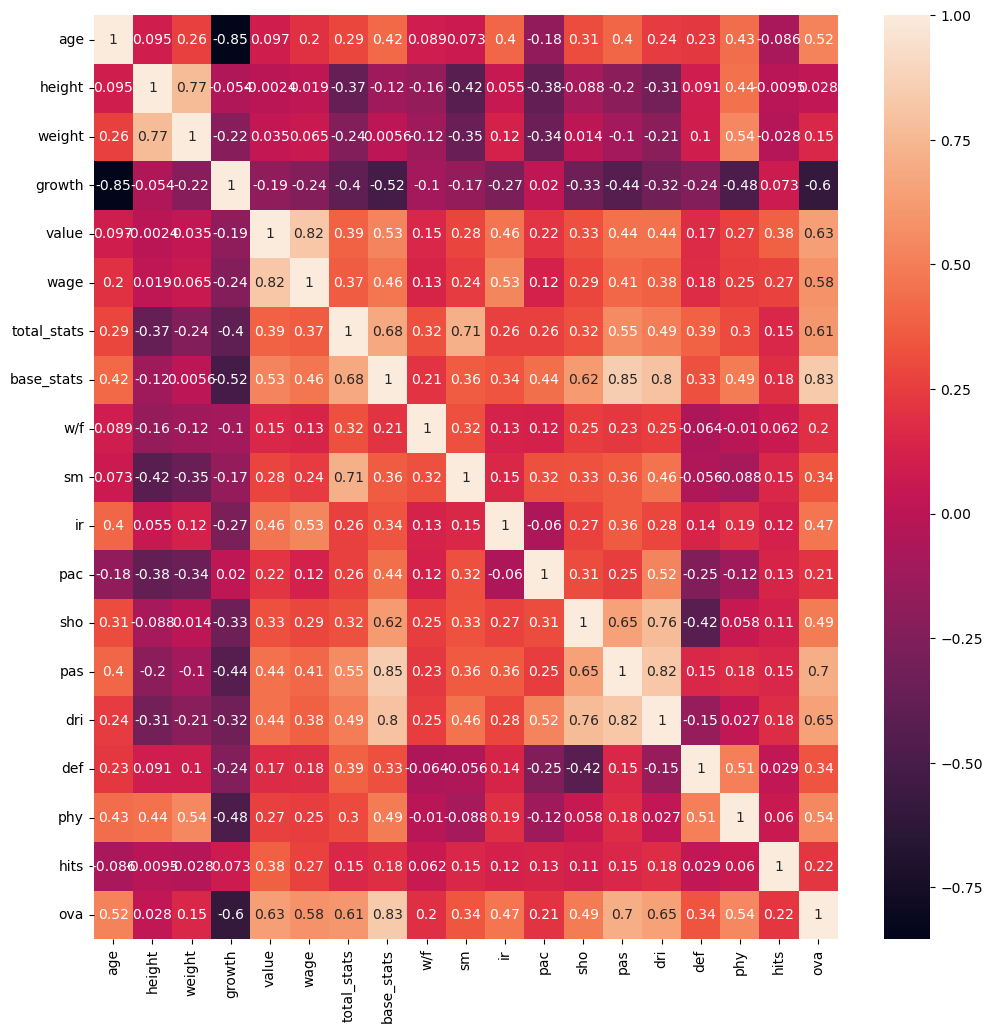

In [22]:
correlations_matrix = fifa_numerical_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [23]:
correlations_matrix

age    height    weight    growth     value      wage  \
age          1.000000  0.095369  0.257338 -0.854136  0.096757  0.199411   
height       0.095369  1.000000  0.768096 -0.053797 -0.002372  0.019131   
weight       0.257338  0.768096  1.000000 -0.219624  0.035361  0.064773   
growth      -0.854136 -0.053797 -0.219624  1.000000 -0.186735 -0.236945   
value        0.096757 -0.002372  0.035361 -0.186735  1.000000  0.820164   
wage         0.199411  0.019131  0.064773 -0.236945  0.820164  1.000000   
total_stats  0.286428 -0.367082 -0.242916 -0.395493  0.390282  0.369005   
base_stats   0.417633 -0.118051  0.005588 -0.516137  0.526670  0.464425   
w/f          0.088939 -0.161631 -0.119104 -0.104888  0.151226  0.131277   
sm           0.072587 -0.423024 -0.348603 -0.165475  0.276583  0.243803   
ir           0.402010  0.054875  0.119917 -0.269322  0.457919  0.530257   
pac         -0.176232 -0.380658 -0.341935  0.019677  0.215480  0.118841   
sho          0.311175 -0.087724  0.013883 -0.334891  0.325187  0.289614   
pas          0.402361 -0.204511 -0.100392 -0.439781  0.444784  0.411032   
dri          0.242675 -0.310837 -0.210029 -0.320569  0.442928  0.379007   
def          0.225285  0.090802  0.101667 -0.240244  0.168934  0.179833   
phy          0.434448  0.444814  0.538053 -0.484123  0.265114  0.250510   
hits        -0.086071 -0.009463 -0.027792  0.073142  0.379126  0.273144   
ova          0.519799  0.028210  0.149397 -0.596642  0.632303  0.579995   

             total_stats  base_stats       w/f        sm        ir       pac  \
age             0.286428    0.417633  0.088939  0.072587  0.402010 -0.176232   
height         -0.367082   -0.118051 -0.161631 -0.423024  0.054875 -0.380658   
weight         -0.242916    0.005588 -0.119104 -0.348603  0.119917 -0.341935   
growth         -0.395493   -0.516137 -0.104888 -0.165475 -0.269322  0.019677   
value           0.390282    0.526670  0.151226  0.276583  0.457919  0.215480   
wage            0.369005    0.464425  0.131277  0.243803  0.530257  0.118841   
total_stats     1.000000    0.677152  0.322277  0.714200  0.263584  0.257918   
base_stats      0.677152    1.000000  0.208412  0.362797  0.338856  0.439814   
w/f             0.322277    0.208412  1.000000  0.323614  0.126768  0.117257   
sm              0.714200    0.362797  0.323614  1.000000  0.154701  0.324848   
ir              0.263584    0.338856  0.126768  0.154701  1.000000 -0.060492   
pac             0.257918    0.439814  0.117257  0.324848 -0.060492  1.000000   
sho             0.319691    0.617893  0.250939  0.333263  0.273856  0.305295   
pas             0.553716    0.850402  0.225219  0.360844  0.356973  0.248108   
dri             0.493405    0.801646  0.253495  0.456556  0.283342  0.523442   
def             0.389358    0.326364 -0.063835 -0.055945  0.136093 -0.250853   
phy             0.300960    0.491160 -0.009979 -0.087581  0.188870 -0.121209   
hits            0.147966    0.183094  0.061527  0.147920  0.118449  0.131649   
ova             0.608433    0.834331  0.195136  0.343938  0.465274  0.206624   

                  sho       pas       dri       def       phy      hits  \
age          0.311175  0.402361  0.242675  0.225285  0.434448 -0.086071   
height      -0.087724 -0.204511 -0.310837  0.090802  0.444814 -0.009463   
weight       0.013883 -0.100392 -0.210029  0.101667  0.538053 -0.027792   
growth      -0.334891 -0.439781 -0.320569 -0.240244 -0.484123  0.073142   
value        0.325187  0.444784  0.442928  0.168934  0.265114  0.379126   
wage         0.289614  0.411032  0.379007  0.179833  0.250510  0.273144   
total_stats  0.319691  0.553716  0.493405  0.389358  0.300960  0.147966   
base_stats   0.617893  0.850402  0.801646  0.326364  0.491160  0.183094   
w/f          0.250939  0.225219  0.253495 -0.063835 -0.009979  0.061527   
sm           0.333263  0.360844  0.456556 -0.055945 -0.087581  0.147920   
ir           0.273856  0.356973  0.283342  0.136093  0.188870  0.118449   
pac          0.3

In [ ]:
#dropping height, weight, hits as it has low correlation value with ova.
#dropping age because age and growth have a -0.85
#Height and Weight doesn't seem to have any correlation.
#Dropping pas and dri as base_stats has >0.8 correlation 
#Dropping wage as wage and value have >0.8

In [24]:
y=fifa_numerical_data.loc[:,['ova']]
y

ova
0       64
1       77
2       80
3       59
4       65
5       71
6       76
7       60
8       65
9       67
10      72
11      64
12      68
13      73
14      54
15      67
16      63
17      71
18      66
19      64
20      62
21      69
22      59
23      64
24      63
25      55
26      66
27      77
28      77
29      68
30      59
31      68
32      60
33      64
34      65
35      61
36      60
37      61
38      69
39      55
40      74
41      71
42      66
43      73
44      76
45      64
46      64
47      66
48      69
49      59
50      83
51      67
52      61
53      74
54      57
55      73
56      68
57      84
58      67
59      65
60      61
61      76
62      63
63      67
64      65
65      85
66      73
67      73
68      68
69      62
70      65
71      55
72      76
73      78
74      65
75      57
76      75
77      68
78      68
79      71
80      61
81      75
82      68
83      62
84      63
85      66
86      65
87      63
88      65
89      58
90      61
91      51
92      75
93      69
94      67
95      72
96      65
97      75
98      65
99      70
100     64
101     76
102     81
103     75
104     77
105     69
106     74
107     70
108     68
109     65
110     70
111     62
112     56
113     62
114     71
115     65
116     81
117     70
118     62
119     69
120     63
121     70
122     57
123     57
124     76
125     54
126     53
127     61
128     63
129     72
130     78
131     55
132     67
133     67
134     70
135     72
136     64
137     76
138     67
139     68
140     67
141     80
142     73
143     63
144     64
145     69
146     74
147     72
148     70
149     62
150     64
151     63
152     66
153     73
154     65
155     72
156     68
157     63
158     59
159     74
160     71
161     73
162     66
163     61
164     59
165     63
166     63
167     65
168     53
169     73
170     68
171     77
172     59
173     68
174     62
175     75
176     78
177     59
178     69
179     80
180     75
181     56
182     60
183     60
184     55
185     62
186     69
187     65
188     65
189     68
190     75
191     59
192     64
193     58
194     74
195     73
196     64
197     81
198     64
199     74
200     60
201     58
202     50
203     57
204     70
205     69
206     62
207     65
208     54
209     55
210     64
211     75
212     66
213     69
214     70
215     61
216     58
217     63
218     69
219     77
220     59
221     73
222     66
223     76
224     79
225     75
226     63
227     65
228     70
229     73
230     72
231     78
232     64
233     61
234     70
235     72
236     61
237     69
238     57
239     57
240     61
241     56
242     70
243     74
244     70
245     66
246     72
247     64
248     70
249     58
250     65
251     67
252     81
253     67
254     62
255     60
256     67
257     85
258     67
259     67
260     69
261     69
262     69
263     59
264     76
265     63
266     70
267     75
268     70
269     64
270     74
271     67
272     62
273     76
274     72
275     68
276     64
277     64
278     55
279     78
280     65
281     65
282     63
283     57
284     74
285     59
286     70
287     66
288     70
289     64
290     69
291     68
292     71
293     81
294     66
295     73
296     71
297     70
298     64
299     65
300     79
301     62
302     62
303     60
304     68
305     64
306     70
307     67
308     60
309     69
310     75
311     62
312     64
313     75
314     63
315     70
316     68
317     78
318     66
319     58
320     74
321     78
322     74
323     73
324     76
325     71
326     71
327     64
328     66
329     67
330     67
331     63
332     64
333     65
334     76
335     56
336     72
337     61
338     54
339     66
340     80
341     72
342     55
343     69
344     79
345     76
346     63
347     77
348     69
349     75
350     70
351     72
352     76
353     62
354     79
355     67
356     75
357     77
358     62
359     65
360     63
361     71
362     76
363

In [25]:
X_num = fifa_numerical_data.loc[:,["growth","value","base_stats","total_stats","w/f","sm","ir","pac","sho","def","phy"]]
X_num

growth       value  base_stats  total_stats  w/f  sm  ir  pac  sho  \
0           1    525000.0         357         1682    4   2   1   69   51   
1           0   8500000.0         412         1961    3   4   2   83   75   
2           0   9000000.0         404         1925    4   4   2   80   77   
3          13    275000.0         329         1527    2   2   1   57   44   
4           8    725000.0         360         1664    2   3   1   66   44   
5           0   1400000.0         379         1808    4   3   1   74   63   
6           0   6000000.0         410         1923    5   3   2   67   58   
7           7    300000.0         327         1523    2   2   1   62   48   
8           0    210000.0         338         1636    2   2   1   34   50   
9           0    220000.0         381         1809    3   3   1   54   62   
10          0    625000.0         337         1619    3   2   2   37   43   
11          7    650000.0         339         1542    3   3   1   83   55   
12          0    800000.0         376         1736    3   2   1   56   47   
13          7   5000000.0         396         1784    3   3   1   78   44   
14         15    130000.0         282         1330    2   2   1   65   33   
15          7   1100000.0         360         1715    3   4   1   70   66   
16          2    325000.0         355         1091    3   1   1   62   60   
17          0    130000.0         404         1999    3   3   3   54   67   
18          3    825000.0         366         1656    3   3   1   85   62   
19          2    500000.0         343         1581    2   2   1   59   43   
20          8    350000.0         337          887    3   1   1   66   67   
21          7   1100000.0         385         1200    3   1   1   70   66   
22         17    325000.0         310         1428    3   2   1   63   57   
23         17   1000000.0         347         1623    3   3   1   67   51   
24          3    475000.0         345         1626    3   2   1   63   62   
25         14    160000.0         322         1491    3   3   1   61   50   
26          2    675000.0         358         1627    3   2   1   67   39   
27         10  14500000.0         413         1942    4   4   1   87   73   
28          0   9000000.0         402         1889    4   4   1   80   75   
29          0    900000.0         387         1749    5   3   1   78   62   
30         11    275000.0         316         1413    3   2   1   80   59   
31          3   1100000.0         366         1680    3   3   1   74   64   
32          3         0.0         285         1027    2   1   1   63   24   
33          9    650000.0         302         1401    2   2   1   63   31   
34          0    425000.0         345         1602    4   3   1   74   58   
35          1    300000.0         312         1487    3   2   1   53   61   
36         14    425000.0         297         1349    3   2   1   63   23   
37         11    450000.0         306         1431    4   2   1   54   61   
38          2   1100000.0         376         1725    2   2   1   46   59   
39          0     60000.0         308         1478    3   2   1   58   38   
40         11  10000000.0         396         1885    2   3   1   79   74   
41          0   1800000.0         398         1835    3   2   1   72   51   
42          4    725000.0         370         1699    2   2   1   67   46   
43          0   1800000.0         403         1946    3   3   1   65   58   
44          4         0.0         420         1555    4   1   2   64   67   
45         10    750000.0         317         1469    3   3   1   67   63   
46          3    500000.0         293         1424    2   2   1   51   28   
47          0    700000.0         346         1687    3   4   1   77   64   
48          7   1500000.0         345         1648    2   3   1   70   70   
49         19    325000.0         303         1436    2   2   1   69   62   
50          0  16500000.0         406         1872    3   3   2   62   50   
51 

In [28]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
fifa_nor_pd = pd.DataFrame(x_normalized, columns=X_num.columns)

(11701, 11)


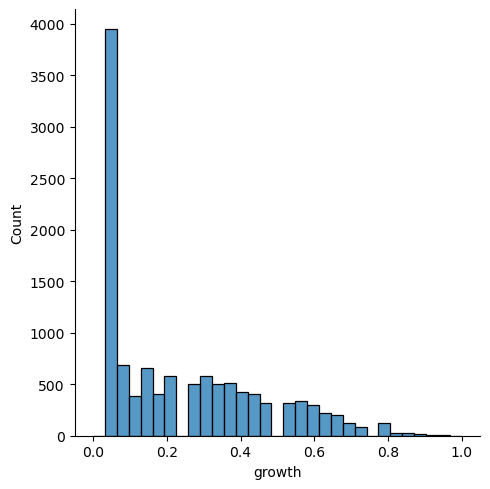

In [29]:
sns.displot(fifa_nor_pd['growth'])
plt.show()

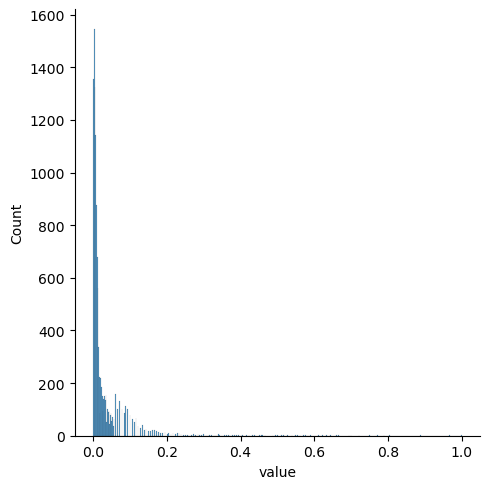

In [30]:
sns.displot(fifa_nor_pd['value'])
plt.show()

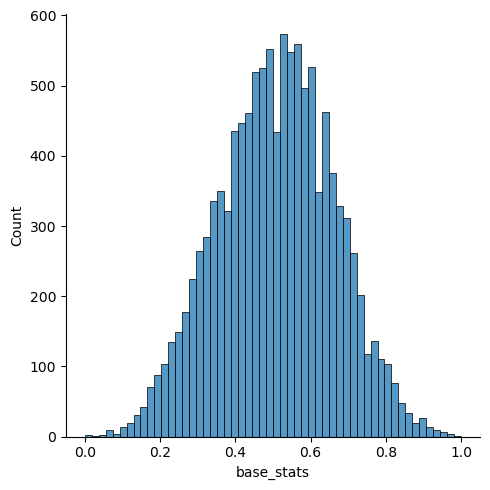

In [31]:
sns.displot(fifa_nor_pd['base_stats'])
plt.show()

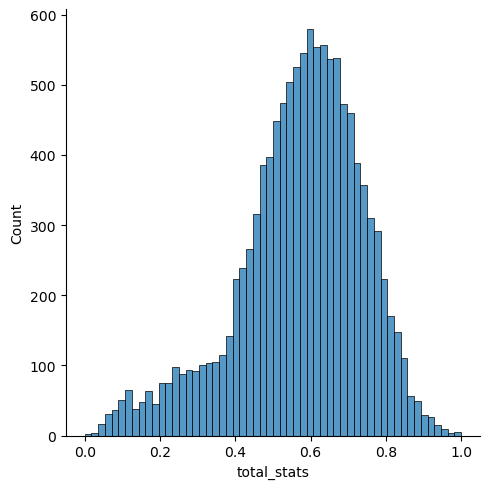

In [32]:
sns.displot(fifa_nor_pd['total_stats'])
plt.show()

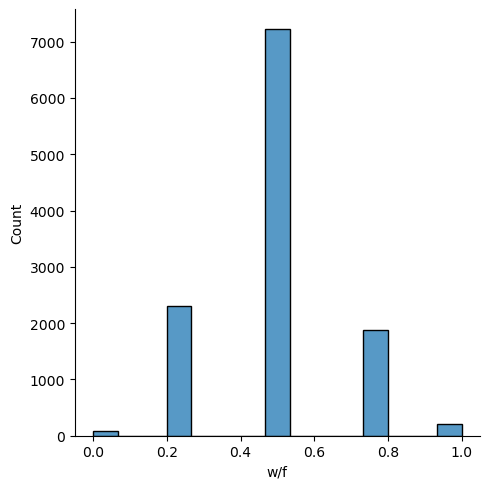

In [33]:
sns.displot(fifa_nor_pd['w/f'])
plt.show()

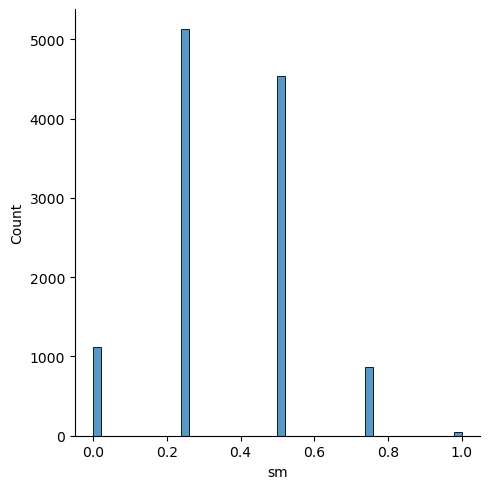

In [34]:
sns.displot(fifa_nor_pd['sm'])
plt.show()

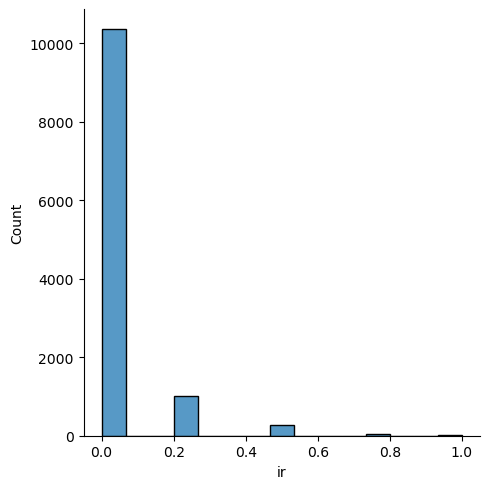

In [35]:
sns.displot(fifa_nor_pd['ir'])
plt.show()

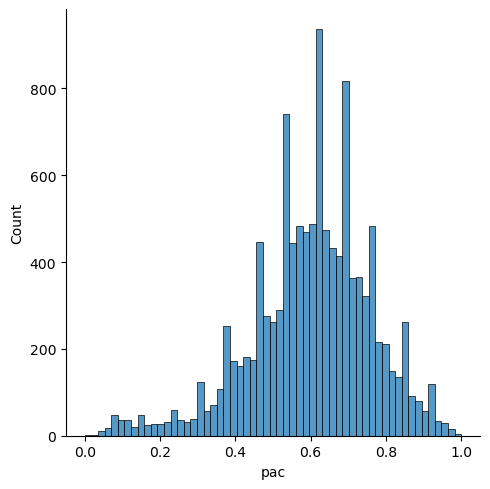

In [36]:
sns.displot(fifa_nor_pd['pac'])
plt.show()

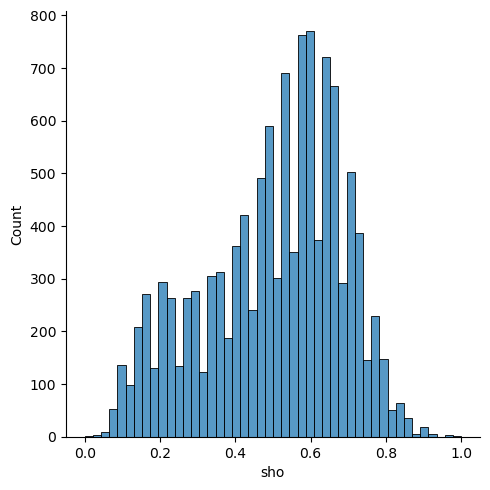

In [37]:
sns.displot(fifa_nor_pd['sho'])
plt.show()

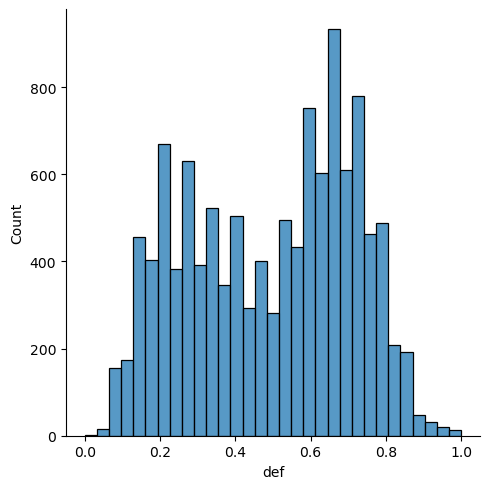

In [38]:
sns.displot(fifa_nor_pd['def'])
plt.show()

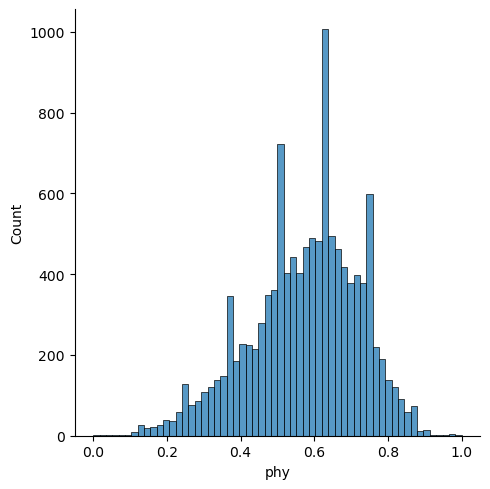

In [39]:
sns.displot(fifa_nor_pd['phy'])
plt.show()

In [40]:
fifa_cat_data.head()

name   bp     a/w     d/w
0      A. Pasche   CM    High  Medium
1  Alan Carvalho   ST    High     Low
2    S. Giovinco  CAM    High  Medium
3       J. Evans  CDM  Medium  Medium
4     Y. Demoncy  CDM     Low  Medium

In [41]:
X_cat = fifa_cat_data.drop(['name'], axis=1) 

In [42]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
#OneHotEncoder can take multiple categorical columns, It will just drop the first value (usually highest)
from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder().fit(X_cat)
encoder = OneHotEncoder(drop='first').fit(X_cat)
#print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()

#As there are multiple categorical columns, the get_feature_names_out will assign the column name. 
#Otherwise it will be 1s and 0s and confusing
onehot_encoded = pd.DataFrame(encoded, columns = encoder.get_feature_names_out()) 
onehot_encoded.head()

bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
0    0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0    0.0   
1    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
3    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

   bp_RM  bp_RW  bp_RWB  bp_ST  a/w_Low  a/w_Medium  d/w_Low  d/w_Medium  
0    0.0    0.0     0.0    0.0      0.0         0.0      0.0         1.0  
1    0.0    0.0     0.0    1.0      0.0         0.0      1.0         0.0  
2    0.0    0.0     0.0    0.0      0.0         0.0      0.0         1.0  
3    0.0    0.0     0.0    0.0      0.0         1.0      0.0         1.0  
4    0.0    0.0     0.0    0.0      1.0         0.0      0.0         1.0

In [43]:
#label encoding keeps just one column and makes it numerical, but watch out: you may be introducing unintended semantics
#if you want to control which number gets assigned to which category, you can use OrdinalEncoder
#label Encoder takes only 1 1-d array as an argument

from sklearn.preprocessing import LabelEncoder
trial = X_cat.copy()

trial = trial.apply(LabelEncoder().fit_transform)
print(trial)

label_encoded = pd.DataFrame(trial, columns=X_cat.columns)
display(label_encoded.head(20))

       bp  a/w  d/w
0       4    0    2
1      14    0    1
2       0    0    2
3       2    2    2
4       2    1    2
5       7    0    1
6      10    2    0
7       7    2    2
8       1    2    2
9       1    2    2
10      1    2    2
11     11    0    1
12      2    2    2
13     10    2    2
14      1    2    2
15      0    0    1
16      5    2    2
17      4    2    2
18     14    2    1
19      2    2    2
20      5    2    2
21      5    2    2
22     14    0    1
23      0    2    2
24     14    0    2
25      0    0    2
26      1    2    2
27      0    0    2
28     14    2    2
29      7    2    2
30     14    2    2
31     11    2    2
32      1    2    2
33      1    1    0
34      7    2    1
35     14    2    2
36      1    2    2
37     14    2    2
38      1    2    0
39      6    2    2
40     14    0    1
41      2    2    0
42      6    2    2
43      6    0    2
44      4    2    2
45     14    2    2
46      1    1    2
47     11    0    2
48     14    2    2


bp  a/w  d/w
0    4    0    2
1   14    0    1
2    0    0    2
3    2    2    2
4    2    1    2
5    7    0    1
6   10    2    0
7    7    2    2
8    1    2    2
9    1    2    2
10   1    2    2
11  11    0    1
12   2    2    2
13  10    2    2
14   1    2    2
15   0    0    1
16   5    2    2
17   4    2    2
18  14    2    1
19   2    2    2

In [45]:
X = pd.concat([fifa_nor_pd, onehot_encoded], axis=1)

In [46]:
X.head()

growth     value  base_stats  total_stats   w/f    sm    ir       pac  \
0  0.074074  0.005833    0.492366     0.604577  0.75  0.25  0.00  0.614286   
1  0.037037  0.094444    0.702290     0.781945  0.50  0.75  0.25  0.814286   
2  0.037037  0.100000    0.671756     0.759059  0.75  0.75  0.25  0.771429   
3  0.518519  0.003056    0.385496     0.506039  0.25  0.25  0.00  0.442857   
4  0.333333  0.008056    0.503817     0.593134  0.25  0.50  0.00  0.571429   

        sho       def  ...  bp_LWB  bp_RB  bp_RM  bp_RW  bp_RWB  bp_ST  \
0  0.447368  0.506494  ...     0.0    0.0    0.0    0.0     0.0    0.0   
1  0.763158  0.272727  ...     0.0    0.0    0.0    0.0     0.0    1.0   
2  0.789474  0.194805  ...     0.0    0.0    0.0    0.0     0.0    0.0   
3  0.355263  0.584416  ...     0.0    0.0    0.0    0.0     0.0    0.0   
4  0.355263  0.623377  ...     0.0    0.0    0.0    0.0     0.0    0.0   

   a/w_Low  a/w_Medium  d/w_Low  d/w_Medium  
0      0.0         0.0      0.0         1.0  
1      0.0         0.0      1.0         0.0  
2      0.0         0.0      0.0         1.0  
3      0.0         1.0      0.0         1.0  
4      1.0         0.0      0.0         1.0  

[5 rows x 29 columns]

In [47]:
y.head()

ova
0   64
1   77
2   80
3   59
4   65

In [48]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in 
# another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 29)
(2341, 29)
(9360, 1)
(2341, 1)


In [50]:
X_train.head()

growth     value  base_stats  total_stats   w/f    sm    ir       pac  \
1775  0.333333  0.005000    0.305344     0.462174  0.50  0.25  0.00  0.542857   
2455  0.037037  0.066667    0.431298     0.619835  0.50  0.25  0.00  0.057143   
93    0.037037  0.005556    0.412214     0.575969  0.50  0.25  0.25  0.357143   
8952  0.592593  0.001889    0.335878     0.461538  0.50  0.25  0.00  0.571429   
7810  0.037037  0.133333    0.812977     0.868404  0.75  0.75  0.25  0.814286   

           sho       def  ...  bp_LWB  bp_RB  bp_RM  bp_RW  bp_RWB  bp_ST  \
1775  0.565789  0.142857  ...     0.0    0.0    0.0    0.0     0.0    1.0   
2455  0.815789  0.207792  ...     0.0    0.0    0.0    0.0     0.0    1.0   
93    0.223684  0.714286  ...     0.0    0.0    0.0    0.0     0.0    0.0   
8952  0.381579  0.337662  ...     0.0    0.0    0.0    0.0     0.0    0.0   
7810  0.828947  0.467532  ...     0.0    0.0    0.0    0.0     0.0    1.0   

      a/w_Low  a/w_Medium  d/w_Low  d/w_Medium  
1775      0.0         1.0      0.0         1.0  
2455      0.0         1.0      0.0         1.0  
93        0.0         1.0      0.0         0.0  
8952      0.0         1.0      0.0         1.0  
7810      0.0         0.0      0.0         0.0  

[5 rows x 29 columns]

In [51]:
y_train.head()

ova
1775   62
2455   74
93     69
8952   55
7810   79

In [52]:
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8642803338699682

In [56]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data


predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8594007364730282

In [57]:
y_test[:5]

ova
2405    49
8025    70
10025   62
10933   72
1402    64

In [58]:
predictions_test[:5]

array([[51.27785347],
       [69.17850983],
       [65.31451551],
       [71.72912522],
       [65.10754517]])